## 14. Data science

![Data management](https://raw.githubusercontent.com/amaargiru/pycore/refs/heads/main/pics/Data%20Science.png)  

### NumPy

Мини-язык для манипулирования массивами. На удачных сценариях работает в сотни раз быстрее встроенных функций. Еще более быстрая альтернатива работает на GPU, называется [CuPy](https://github.com/cupy/cupy) и опять-таки [обещает](https://medium.com/rapids-ai/single-gpu-cupy-speedups-ea99cbbb0cbb) стократный прирост производительности, только уже по сравнению с NumPy. Так что если вам нужен какой-нибудь быстрый [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) или еще какой числогрыз, то вы знаете, что делать. Если вы дружите с английским, то изучайте [официальный мануал](https://numpy.org/doc/stable/), если нет — на «Хабре» есть [перевод](https://habr.com/ru/post/352678/) (как всегда, читайте комментарии, там немало полезного).

Небольшое отступление.

Во-первых, тут мы переходим границу между встроенной функциональность языка и внешними библиотеками. Надо понимать, что успех Python во многом основан именно на богатстве его экосистемы (хотя, впрочем, то же самое можно сказать и про JavaScript, и про C#); сам язык предоставляет богатую, но всё же ограниченную функциональность, в то время как функционал внешних библиотек практически неисчерпаем; это как бесконечно разнообразные кубики Лего, из которых можно построить как средневековый замок, так и звездолёт. Соответственно, очень часто для решения задачи не нужно реализовывать алгоритм с нуля на чистом Python'е, достаточно подобрать нужную библиотеку.

Во-вторых, популярность разных библиотек Python (в том числе и конкурирующих) сильно разнится. Например, NumPy — очень популярная библиотека, но в мире существуют буквально миллионы Python-разработчиков, которые *никогда* не работали с NumPy, просто в силу своего круга функциональных обязанностей.

Для начинающего разработчика это представляет собой довольно нешуточную проблему — как конкретно двигаться вперед, какие библиотеки изучать, ведь знания чистого Python, как правило, недостаточно для формирования актуального резюме.

Дам вам небольшой совет. Ежегодно компания JetBrains (делающая среди прочего очень классную IDE PyCharm) проводит всемирный опрос Python-разработчиков, а потом выкладывает полученные результаты в виде так называемого [Python Developers Survey Results](https://www.jetbrains.com/lp/devecosystem-2023/python/). Например, если вы почитаете результаты последнего исследования, то найдете там довольно чёткие ориентиры: скажем, в разделе «Data science frameworks and libraries» в топе находятся NumPy, Pandas и Matplotlib ((рассмотрены ниже)); в тестировании с большим отрывом лидирует pytest (смотри ниже), в других областях вперед вырываются Flask (Django на втором месте с крошечным отрывом), SQLAlchemy (vs Django ORM) и PostgreSQL (vs SQLite), про них мы тоже еще поговорим. Так что в целом, общее направление развития определить можно.

Однако, вернемся к NumPy. Не забывайте, что в основе NumPy лежат массивы, а все данные в массиве должны быть одинакового типа (просто на случай, если вы уже познали пр-р-рел-л-лесть всеядных списков Python). Создание массивов:

In [11]:
import numpy as np

a1 = np.array([1, 2, 3, 4, 5], float)  # Получение массива из списка
print(a1[0:2])

a2 = np.zeros(5)  # Массив, заполненный нулями
print(a2)

a3 = np.arange(0, 6, 1)  # Использование диапазона, np.arange(from_inclusive, to_exclusive, step_size)
print(a3)

a4 = np.random.randint(6, size=10)  # Создание массива, содержащего случайные значения, np.random.randint(low_inclusive, high_exclusive=None, size=None, dtype=int)
print(a4)

a5 = np.random.randint(6, size=(2, 5))  # Создание многомерного массива, содержащего случайные значения
print(a5)

print(a5.shape)  # Число строк и столбцов в массиве

print(a5.dtype)  # Тип переменных

print(1 in a5)  # Проверка наличия элемента

[1. 2.]
[0. 0. 0. 0. 0.]
[0 1 2 3 4 5]
[2 2 4 0 0 0 0 4 0 5]
[[1 0 3 5 0]
 [3 1 4 2 2]]
(2, 5)
int32
True


Базовые математические операции ([полный список](https://numpy.org/doc/stable/reference/routines.math.html)):

In [18]:
import numpy as np

a1 = np.array([1, 2, 3, 4, 5])
a2 = np.array([6, 7, 8, 9, 10])

a3 = a1 + 1
print(a3)

a4 = a1 + a2
print(a4)

a5 = a1 ** 3
print(a5)

a6 = a1 ** a2
print(a6)

[2 3 4 5 6]
[ 7  9 11 13 15]
[  1   8  27  64 125]
[      1     128    6561  262144 9765625]


Вообще, можно сказать, что быстрые математические операции над многомерными массивами — это главная «фишка» NumPy. Вы просто говорите: возьми такие-то массивы и проделай над ними такую-то операцию. Далее все эти данные «проваливаются» в высокоскоростное ядро NumPy, где к ним уже можно применить всю мощь вашего процессора, которая раньше была вам недоступна (ну, или доступна не полностью) из-за ограничений Python-интерпретатора. Так что, если вы пытаетесь в цикле итерировать массив NumPy, по факту передавая данные на нижний уровень небольшими порциями (например, объектами row), то имейте в виду, что тем самым используете возможности NumPy недостаточно эффективно; попробуйте решить задачу без итерирования.    

### Sum, Min, Max

In [16]:
import numpy as np

a1 = np.random.randint(6, size=(2, 10))  # NumPy поддерживает несколько десятков видов распределений, например, Пуассона и Стьюдента
print(a1)

s = np.sum(a1)  # Сумма всех элементов
print(s)

mn = a1.min(axis=0)  # Наименьшие числа в каждом столбце
print(mn)

mx = a1.max(axis=1)  # Наибольшие числа в каждой строке
print(mx)

amin = a1.argmin(axis=0)  # Индексы минимальных элементов в каждом столбце
print(amin)

amax = a1.argmax(axis=1)  # Индексы максимальных элементов в каждой строке
print(amax)

uniq = np.unique(a1)  # Извлечение уникальных элементов
print(uniq)

[[3 0 4 1 0 5 4 0 1 3]
 [0 3 4 0 0 1 4 0 5 4]]
42
[0 0 4 0 0 1 4 0 1 3]
[5 5]
[1 0 0 1 0 1 0 0 0 0]
[5 8]
[0 1 3 4 5]


В качестве домашнего задания попробуйте самостоятельно применить prod(), mean(), var(), std(), median(), cov() и corrcoef().

Форматирование массивов:

In [26]:
import numpy as np

a = np.random.randint(6, size=(3, 5))
print(a)

a1 = a.reshape((5, 3))  # Форматирование. Если есть возможность, создается новый view на те же самые данные
print(a1)

a.shape = (5, 3)  # Форматирование in-place
print(a)

print(a.shape)
a = a[:, :, np.newaxis]  # Увеличение размерности массива с 2 до 3
print(a)
print(a.shape)

a = a.flatten()  # Конвертация в одномерный массив
print(a)
print(a.shape)

[[5 5 5 1 1]
 [0 2 0 5 5]
 [0 2 5 4 5]]
[[5 5 5]
 [1 1 0]
 [2 0 5]
 [5 0 2]
 [5 4 5]]
[[5 5 5]
 [1 1 0]
 [2 0 5]
 [5 0 2]
 [5 4 5]]
(5, 3)
[[[5]
  [5]
  [5]]

 [[1]
  [1]
  [0]]

 [[2]
  [0]
  [5]]

 [[5]
  [0]
  [2]]

 [[5]
  [4]
  [5]]]
(5, 3, 1)
[5 5 5 1 1 0 2 0 5 5 0 2 5 4 5]
(15,)


Копирование массивов:

In [35]:
import numpy as np
import copy

a = np.random.randint(10, size=(4, 4))
print(a)

# Неглубокая (shallow) копия
a1 = np.copy(a)

# Глубокая (deep) копия
a2 = copy.deepcopy(a)

# Копирование ссылки
a3 = a

a[0, 0] = 10
print(a[0, 0] == a1[0, 0])
print(a[0, 0] == a2[0, 0])
print(a[0, 0] == a3[0, 0])

[[5 3 1 4]
 [0 8 7 0]
 [1 7 4 7]
 [5 3 5 2]]
False
False
True


NumPy очень мощный инструмент, не зря же он стоит на первом месте в списке «Data science frameworks and libraries» обзора, который мы упоминали чуть выше. Но углубляться в эту тему очень уж глубоко в рамках нашего достаточно поверхностного очерка, пожалуй, не стоит; вряд ли прямо сейчас вам кровь из носу нужно освоить скалярное, тензорное и внешнее произведение матриц или познать (вспомнить?) специфику линейной алгебры. Думаю, даже если мы сейчас начнем описывать транспонирование или выбор оси, по которой будет произведена конкатенация массивов, то это уже будет, что называется, «не в коня корм».

К тому же, изучая тонкости употребления NumPy, начинает появляться соблазн упоминания SciPy, предоставляющего еще более широкий функционал, а после первого "import scipy" у нас начнётся уже полное непотребство. Давайте пока пройдем мимо этой кроличьей норы, для первого знакомства она слишком глубока.

Единственное, что еще можно освоить в конце ознакомительного курса NumPy — взаимодействие с внешним миром. Изучите для начала load/save/savez (бинарники) и loadtxt/savetxt (человекочитаемый формат).

### Pandas

Библиотека обработки и анализа данных. Работа с данными строится поверх библиотеки NumPy.

В первом, грубом приближении pandas можно воспринимать как некий аналог связки «Excel + VisualBasic-скрипты», только более гибкую и удобную. Библиотека создает своеобразный мостик между профессиями Python-программиста, дата-сайентиста и аналитика, позволяя сосредоточиться в большей степени именно на очистке и анализе данных, на читабельности отчетов, а не на программировании. Pandas также поддерживает широкий спектр «красивостей» при выводе информации, позволяя, например, добавлять в выводимые данные градиентную подсветку (heatmap) или визуализировать отклонение от среднего (bar chart).

Для того чтобы как следует «распробовать» pandas, по-хорошему надо загрузить какой-нибудь развесистый набор данных, но мы, пожалуй, не будем погружаться в глубины глубин, просто поиграем небольшим самодельным датасетом.

In [1]:
import pandas as pd

s = pd.Series([0, 1, 4, 7, 8, 10, 12])
print(s)
print(s[2])

0     0
1     1
2     4
3     7
4     8
5    10
6    12
dtype: int64
4


Series — базовая структура данных pandas. Вы можете воспринимать её как упорядоченный словарь или как строку Excel, смотря по тому, какая аналогия вам ближе.

In [5]:
import pandas as pd

s = pd.Series([0, 1, 4, 7, 8, 10, 12], index=["a", "b", "c", "d", "x", "y", "z"])  # Индексы Series можно задавать вручную

print(s)
print(s["x"])
print(s[["x", "y", "z"]])  # Выборка
print(s[s > 5])  # Фильтрация

print(s.max())  # Математика, примерно как в NumPy
print(s.sum())

a     0
b     1
c     4
d     7
x     8
y    10
z    12
dtype: int64
8
x     8
y    10
z    12
dtype: int64
d     7
x     8
y    10
z    12
dtype: int64
12
42


При объединении нескольких Series получается DataFrame, вторая базовая структура данных pandas, которую в первом приближении можно рассматривать как лист Excel.

In [8]:
import pandas as pd
from pandas import DataFrame

s1 = pd.Series([0, 1, 4, 7, 8, 10, 12])
s2 = pd.Series([0, 100, 200, 300, 600, 900, 1200])

df = pd.DataFrame([s1, s2])
print(df)
print(df[1])
print(df[2][0])
print(df.iloc[0][2:4])

   0    1    2    3    4    5     6
0  0    1    4    7    8   10    12
1  0  100  200  300  600  900  1200
0      1
1    100
Name: 1, dtype: int64
4
2    4
3    7
Name: 0, dtype: int64


Давайте сделаем что-то более похожее на реальный анализ данных. При помощи формулы [ИМТ](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0) выясним, кто из знаменитостей не следит за собой и обзавелся лишним весом:

        Kylie Minogue  Melanie Griffith  Britney Spears  Hulk Hogan
height       1.520000          1.730000        1.630000    1.980000
weight      46.000000         63.000000       57.000000  137.000000
bmi         19.909972         21.049818       21.453574   34.945414


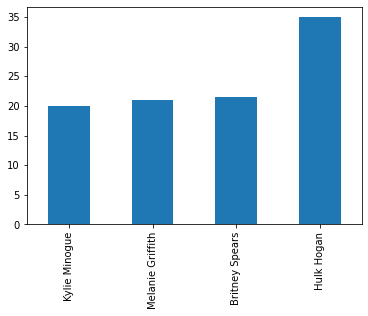

In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt


def bmi(row):  # Расчёт индекса массы тела (ИМТ)
    return row["weight"] / row["height"] ** 2


if __name__ == '__main__':
    celebs: dict = {"Britney Spears": {"height": 1.63, "weight": 57},
                    "Melanie Griffith": {"height": 1.73, "weight": 63},
                    "Kylie Minogue": {"height": 1.52, "weight": 46},
                    "Hulk Hogan": {"height": 1.98, "weight": 137}}

    df = DataFrame(celebs)  # Создаем DataFrame
    df.loc["bmi"] = df.apply(lambda row: bmi(row), axis=0)  # Добавлем новую строку с ИМТ
    df = df.sort_values(by="bmi", ascending=True, axis=1)  # Сортируем

    print(df)

    df.loc["bmi"].plot.bar()  # Визуализация
    plt.show()

На самом деле Халк, конечно, не толстяк, а профессиональный спортсмен, и к нему формула ИМТ малоприменима, но крошка Кайли действительно вырывается вперед, даже с учетом своего небольшого роста.

### Matplotlib/Seaborn

Библиотеку визуализации matplotlib мы уже слегка задействовали в примере выше. Прямо здесь и прямо сейчас глубоко погружаться в разбор возможностей matplotlib/seaborn, наверное, особого смысла не имеет; все вы видели примеры иллюстраций в научной и бизнес-литературе и, разумеется, все эти графики и иллюстрации можно повторить при помощи рассматриваемых библиотек.

Давайте просто для затравки нарисуем пару симпатичных визуализаций, чтобы наглядно показать полезность качественного оформления результатов проделанной работы.  

Тепловая карта (heatmap), наглядно показывающая достижения отдельных членов команды:

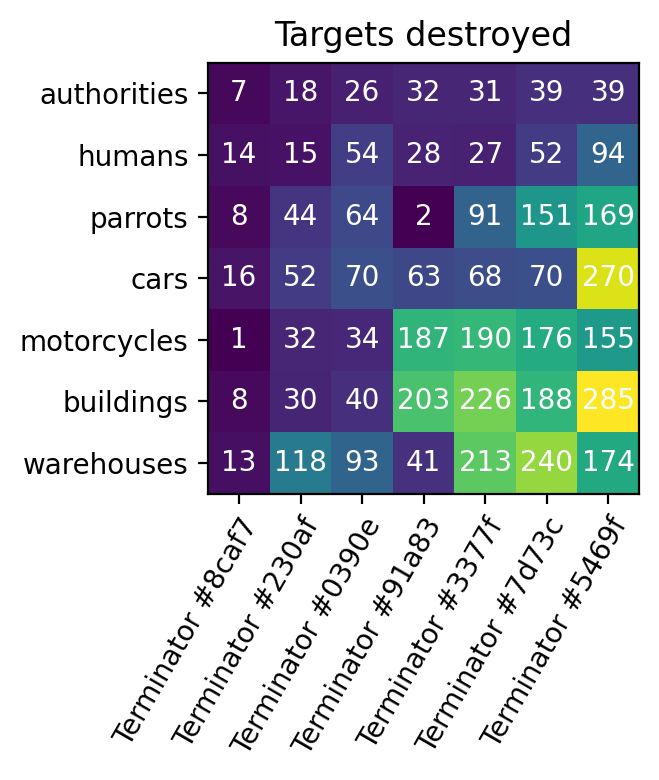

In [2]:
from random import randrange

import numpy as np
import matplotlib.pyplot as plt
import uuid

targets = ["authorities", "humans", "parrots", "cars", "motorcycles", "buildings", "warehouses"]
robots = ["Terminator #" + str(uuid.uuid4())[:5] for _ in range(7)]
harvest = np.array([[randrange(i * j) for i in range(10, 80, 10)] for j in range(1, 8)])

fig, ax = plt.subplots()
im = ax.imshow(harvest)

ax.set_xticks(np.arange(len(robots)), labels=robots)
ax.set_yticks(np.arange(len(targets)), labels=targets)
plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

for i in range(len(targets)):
    for j in range(len(robots)):
        text = ax.text(j, i, harvest[i, j], ha="center", va="center", color="w")

ax.set_title("Targets destroyed")
fig.tight_layout()

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 200
plt.show()

Аналогичная тепловая карта, визуализированная при помощи seaborn:

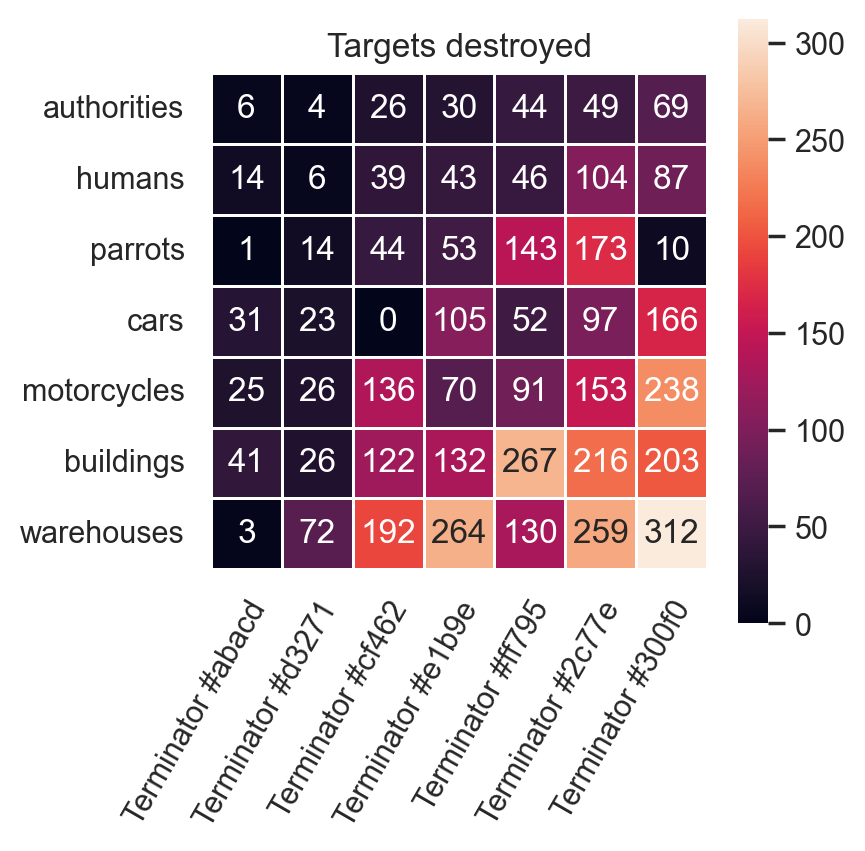

In [3]:
from random import randrange

import numpy as np
import matplotlib.pyplot as plt
import uuid

import seaborn as sns

sns.set_theme()

targets = ["authorities", "humans", "parrots", "cars", "motorcycles", "buildings", "warehouses"]
robots = ["Terminator #" + str(uuid.uuid4())[:5] for _ in range(7)]
harvest = np.array([[randrange(i * j) for i in range(10, 80, 10)] for j in range(1, 8)])

fig, ax = plt.subplots()
im = ax.imshow(harvest)

ax.set_title("Targets destroyed")
plt.rcParams['figure.figsize'] = [4, 4]
sns.heatmap(harvest, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels=robots, yticklabels=targets)
plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
plt.xticks(rotation=60)
plt.show()

А вот так будет выглядеть «Доска почёта» при отрисовке в 3D:

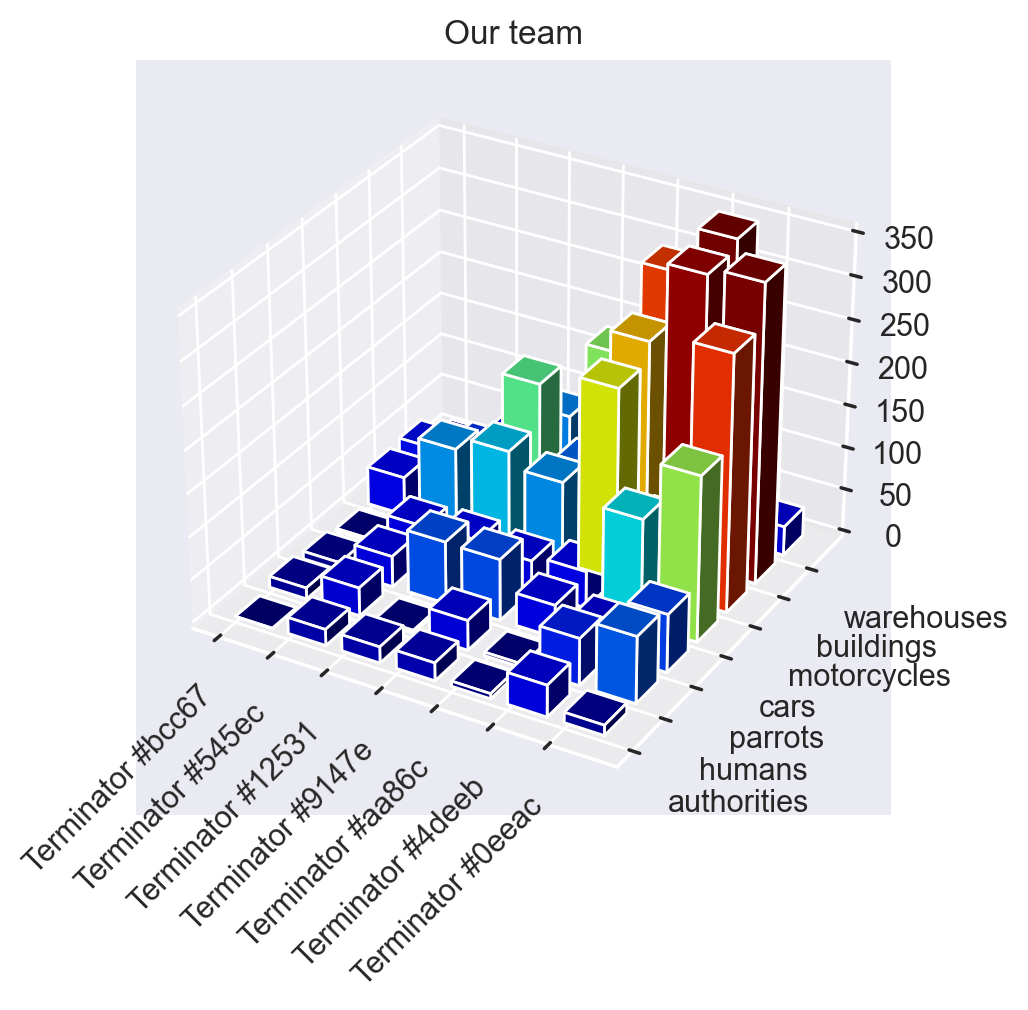

In [4]:
import uuid
from random import randrange

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

targets = ["authorities", "humans", "parrots", "cars", "motorcycles", "buildings", "warehouses"]
robots = ["Terminator #" + str(uuid.uuid4())[:5] for _ in range(7)]
harvest = np.array([[randrange(i * j) for i in range(10, 80, 10)] for j in range(1, 8)])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.set_xticks(np.arange(len(robots)), labels=robots)
ax.set_yticks(np.arange(len(targets)), labels=targets)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), ha="left", rotation_mode="anchor")
ax.set_title("Our team")

xx, yy = np.meshgrid(range(len(targets)), range(len(robots)))
x1d, y1d = xx.ravel(), yy.ravel()
harvest1d = harvest.ravel()

# Setup color scheme
offset = harvest1d + np.abs(harvest1d.min())
fracs = offset.astype(float) / offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.jet(norm(fracs))

ax.bar3d(x1d, y1d, np.zeros_like(x1d + y1d), 0.7, 0.7, harvest1d, color=colors)

plt.show()


### Нейронные сети

Углубиться достаточно глубоко в тематику глубокого обучения в рамках нашего несколько неглубокого формата, конечно, не получится (каким-нибудь томом «Введение в Deep Learning» вполне можно нанести себе существенные травмы, если неудачно уронить со стола), так что скользнём буквально по верхушкам, рассмотрев основные понятия.

Глубинная нейронная сеть (deep neural network) — это, формально выражаясь, *многослойная* искусственная нейронная сеть, использующая алгоритмы машинного обучения для моделирования высокоуровневых абстракций с применением нелинейных преобразований. В ходу есть еще такие термины, как «поверхностное машинное обучение», «слабый ИИ», «сильный ИИ»; существует классификация понятий «глубокое обучение», «машинное обучение» и «искусственный интеллект» (вот, например, [вариант](https://learn.microsoft.com/en-us/azure/machine-learning/concept-deep-learning-vs-machine-learning) от Microsoft, такую же структуру-матрёшку демонстрирует Франсуа Шолле в своей книге «Глубокое обучение на Python»), но сейчас, по крайней мере при неформальном общении, всё чаще ставится знак равенства между «машинным обучением» и «искусственным интеллектом»; причём в работе, как правило, используется «машинное обучение», а при подготовке презентаций — «искусственный интеллект» :) Дело, по всей видимости, в том, что глубокое обучение стало самой многообещающей и динамично развивающейся областью машинного обучения, а искусственным интеллектом уже давно именовали всю эту область знаний как популяризаторы науки, так и журналисты.  

В общем, при первоначальном знакомстве с TensorFlow или PyTorch можете смело всем говорить, что занимаетесь AI, а если захотите углубиться — уж терминологией-то овладеете.  
Что касается сути работы нейронных сетей, то здесь можно выделить следующие основные понятия:

**Датасет** — маркированные данные, используемые для обучения сети и для последующей проверки качества этого обучения. Вариант простого датасета — коллекция изображений одинакового размера с рукописными цифрами и буквами, где про каждое изображение точно известно, какай именно символ в нём содержится; такой датасет нужен для разработки систем распознавания рукописного текста (handwritten text recognition, HTR). Создание качественных датасетов — большая, тяжелая работа, поэтому сейчас идет активная работа по созданию моделей, способных работать с большими объёмами *немаркированных* данных. Как правило, датасет разбивается на две части — для обучения сети и для проверки качества проведенного обучения.

**Искусственная нейронная сеть** — программный или аппаратный аналог биологической нейронной сети; в самом простом варианте, в сети прямого распространения, это последовательно соединенные слои нейронов. Первые реализации нейронных сетей получили практическое воплощение еще в 60-х годах XX века, хотя существенный прогресс и практическое внедрение приходятся примерно на последние лет пятнадцать.

**Архитектура** искусственной нейронной сети — определяет общие принципы её построения, вот [здесь](https://www.asimovinstitute.org/neural-network-zoo/) есть хорошее введение в тему, наглядно показано, чем, например, GAN отличается от LSTM.

**Обучение** нейронной сети — если в двух словах, то это нахождение коэффициентов связи между нейронами. Применительно к машинному обучению заменяет процесс собственно программирования. Когда мы говорим о DALL-E 2, способном создавать изображения по текстовым описаниям или об AlphaGo, обыгрывающем профессиональных игроков в го — мы говорим в первую очередь об обученных нейронных сетях, создатели которых проявили бездну изобретательности, чтобы все коэффициенты связи были на своём месте. Дообучение — частичная корректировка коэффициентов связи между нейронами при модификации старого или добавлении нового функционала.

Зачем нужно машинное обучение? Сильный ИИ, который будет (скрестим пальцы) решать все наши проблемы в режиме реального времени, еще за горизонтом; но уже прямо сейчас нейронные сети решают задачи, неподъемные для классических алгоритмов. Можно ли при помощи «обычного» программирования решить, например, задачу распознавания отсканированного текста или перевода с одного языка на другой? Да, можно, и такие небезуспешные попытки неоднократно предпринимались. Но, учитывая прорыв в развитии математической базы машинного обучения, наметившийся в последние 10-15 лет, помноженный на гигантский прирост производительности даже обычных повседневных вычислительных устройств, вроде смартфонов, фактически и распознавание, и перевод сейчас реализуют только при помощи машинного обучения. Для некоторых же классов задач, таких как распознавание изображений и видео с последующей классификацией объектов или беспилотная транспортировка, решения на базе классических алгоритмов никогда не заходили дальше вялотекущих концептов.

Мало-помалу машинное обучение делает нашу жизнь лучше. Со временем, надеюсь, каждый из нас сможет воспользоваться плодами работы искусственного интеллекта, хоть мы и величаем его «слабым». И речь идет не только о громких проектах, вроде автопилота «Теслы» (хотя и это крайне немаловажно), но в первую очередь о постоянном сканировании эксабайтных потоков информации, порождаемых современной цифровой цивилизацией — видео с уличных камер, сканов МРТ и КТ, телеметрии с фитнес-браслетов, отчетов об исследовании лекарственных средств и пищевых добавок. И если всё это пройдет перед, может быть, пока не очень умными, но зато неустанными глазами предварительно должным образом обученной нейронной сети, то кратно уменьшится неверных диагнозов, людей, умерших от инсультов или замерзших на улицах, а также лекарств с тяжелыми побочными эффектами.

Но помните, однако — даже если вы полны энтузиазма и готовы хоть прямо сейчас нырнуть во все эти модные, интересные и актуальные сущности вроде бигдаты или ИИ — чем дальше вы будете углубляться в эту тематику, тем меньше в вас будет программиста, тем больше исследователя, учёного, математика. Где-то в самом конце этого длинного-предлинного коридора сидит вовсе не Нео из «Матрицы», а эдакий себе [Григорий Перельман](https://en.wikipedia.org/wiki/Grigori_Perelman), уставший человек с ручкой и листом бумаги, иногда этой ручкой на этой бумаге пишущий вещи, которые потом приходится два года разжевывать лучшим математикам мира. Крепко подумайте, как глубоко вы хотите и можете зайти, взвесьте свои силы.
